In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
STORAGE_PATH = "../../persisted_data/feather/{}.feather"

def load_data_set(name):
    data = pd.read_feather(STORAGE_PATH.format(name))
    return data

In [55]:
file_mask = "{}_10spy_30shift_normalized"
countries = ["spain", "brazil", "australia", "canada", "ireland", "usa", "germany", "latvia", "france", "denmark", 
             "isreal", "iceland", "switzerland", "finland", "southkorea", "mexiko", "hongkong", "argentina", 
             "italy", "russia", "thailand", "china", "lithuania", "turkey", "taiwan", "austria", "portugal", 
             "india", "greece", "estonia", "singapore", "norway", "newzealand", "belgium", "qatar", "sweden", 
             "uk", "malaysia", "venezuela", "indonesia", "netherlands"]

country_sets = {country : load_data_set(file_mask.format(country)) for country in countries}

In [21]:
def calculate_correlations(data_sets, label="future_price", feature_transform=lambda feature: feature, label_transform=lambda label: label):
    feature_correlations = {}
    for name, data_set in data_sets.items():
    
        # calculate the correlations for a data set
        correlations = feature_transform(data_set).corrwith(label_transform(data_set[label]))

        # filter out the future columns
        future_columns = [column for column in data_set if "future" in column]
        correlations.drop(future_columns, inplace=True)
        correlations.drop("index", inplace=True)
        feature_correlations[name] = correlations.to_dict()
    
    return feature_correlations

In [22]:
future_price_correlations = calculate_correlations(country_sets, label="future_price", label_transform=np.log)

In [57]:
volatility_correlations = calculate_correlations(country_sets, label="future_volatility10", feature_transform=np.abs)

In [19]:
def correlation_bar_chart(indicator, correlation_values=future_price_correlations):
    correlations = {country: correlations[indicator]
                    for country, correlations in correlation_values.items()
                   }
    largest_set_size = len(country_sets["usa"])
    factor = 1
    set_size = {country: factor * len(data_set) / largest_set_size
                for country, data_set in country_sets.items()
               }

    plt.figure(figsize=(15,10))
    plt.bar(correlation_values.keys(), correlations.values()), list(set_size.values())
    plt.xticks(rotation='vertical')

    plt.show()

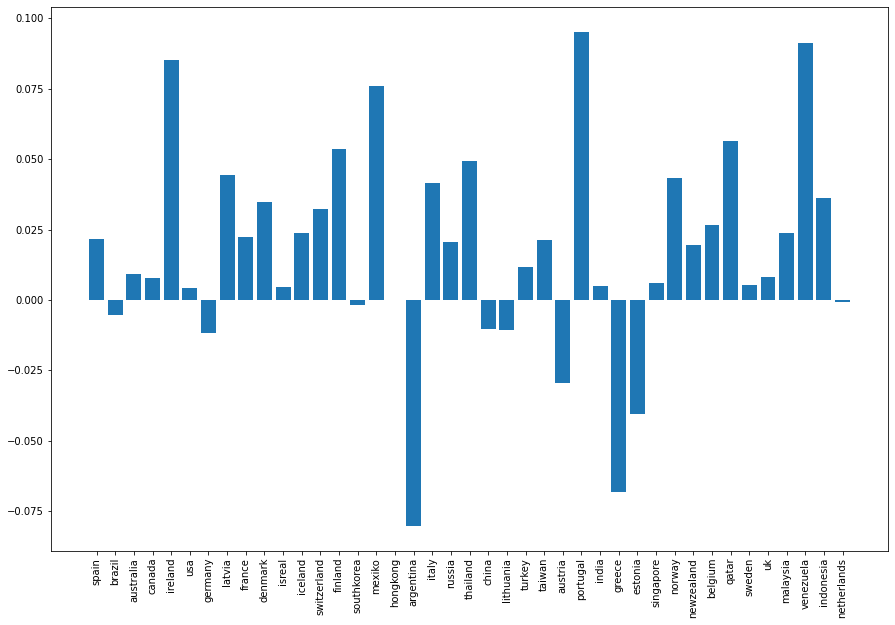

In [20]:
correlation_bar_chart("horizontal_position100")

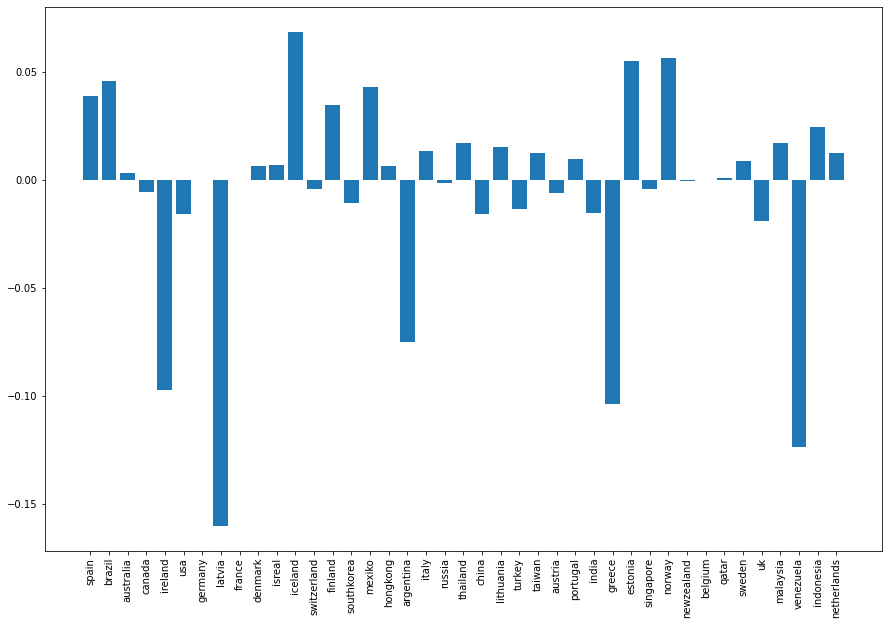

In [7]:
correlation_bar_chart("bollinger_position20_2")

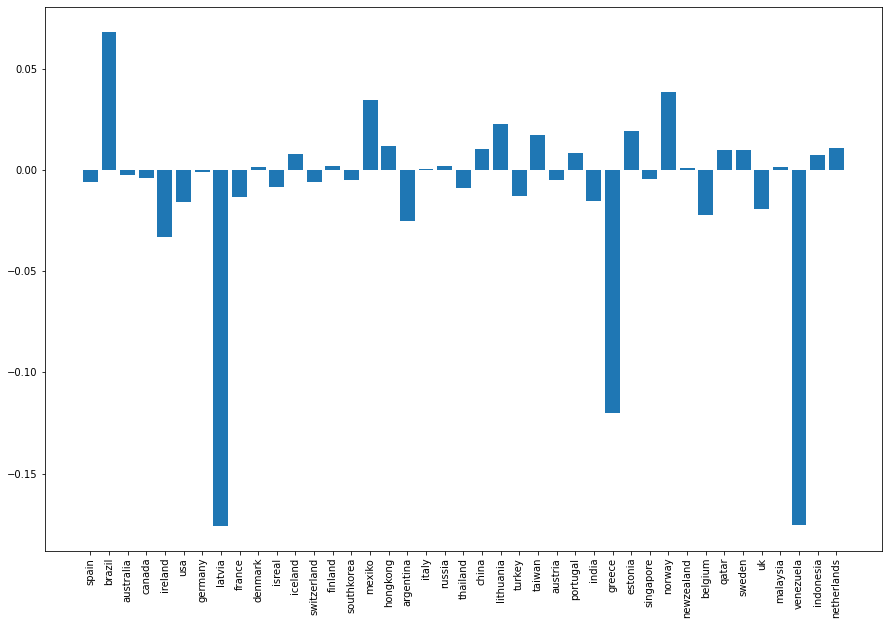

In [8]:
correlation_bar_chart("regression_position50")

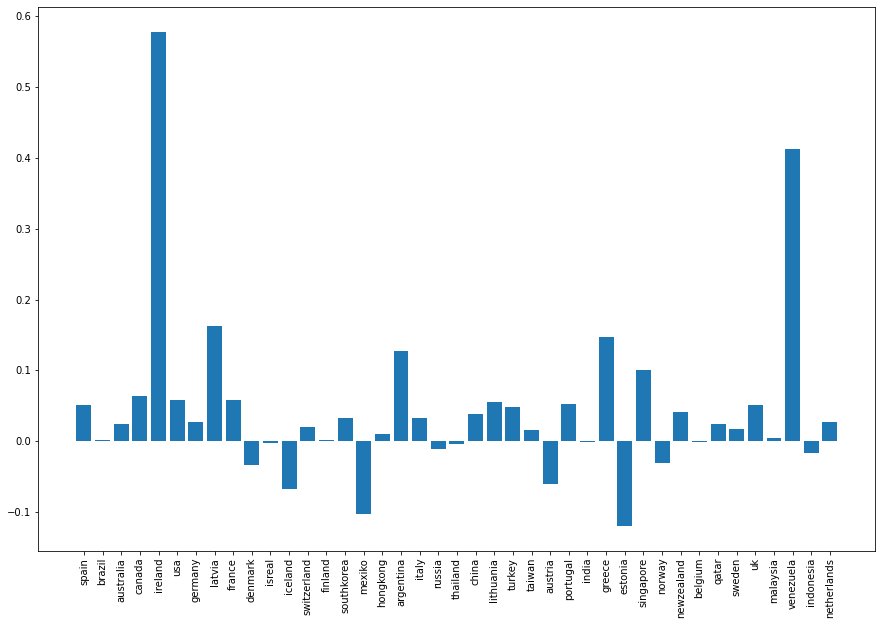

In [9]:
correlation_bar_chart("ema10")

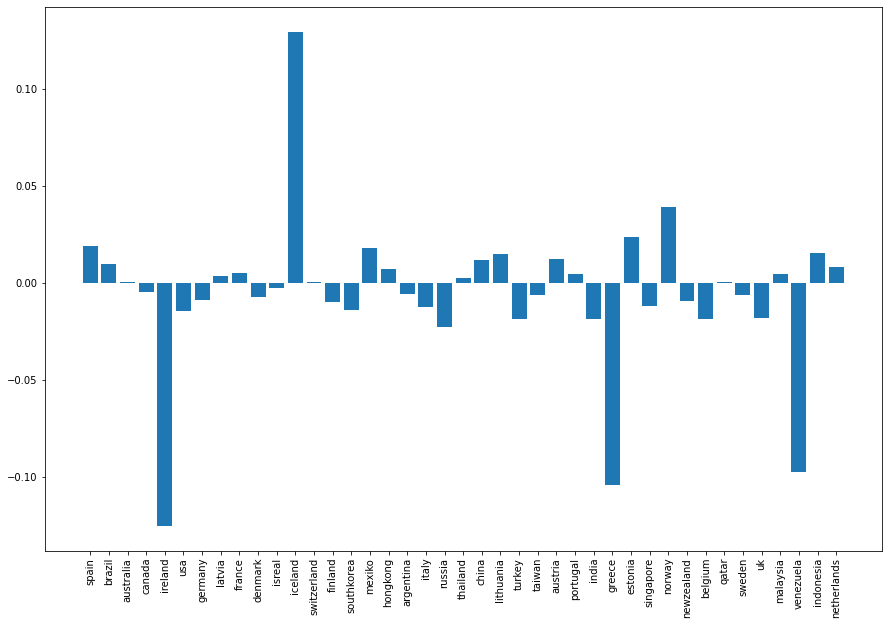

In [10]:
correlation_bar_chart("bollinger_threshold50_2")

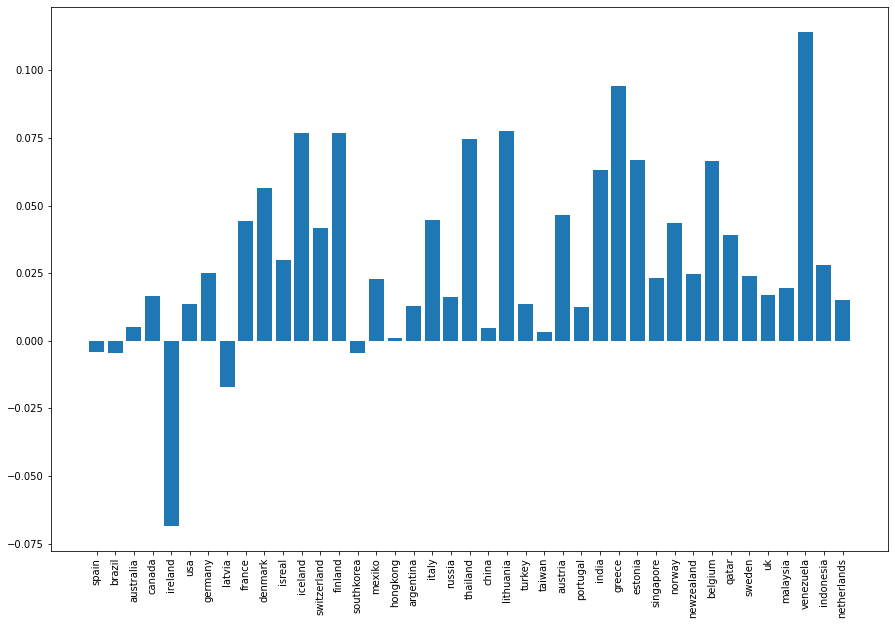

In [11]:
correlation_bar_chart("ma_trend50_200")

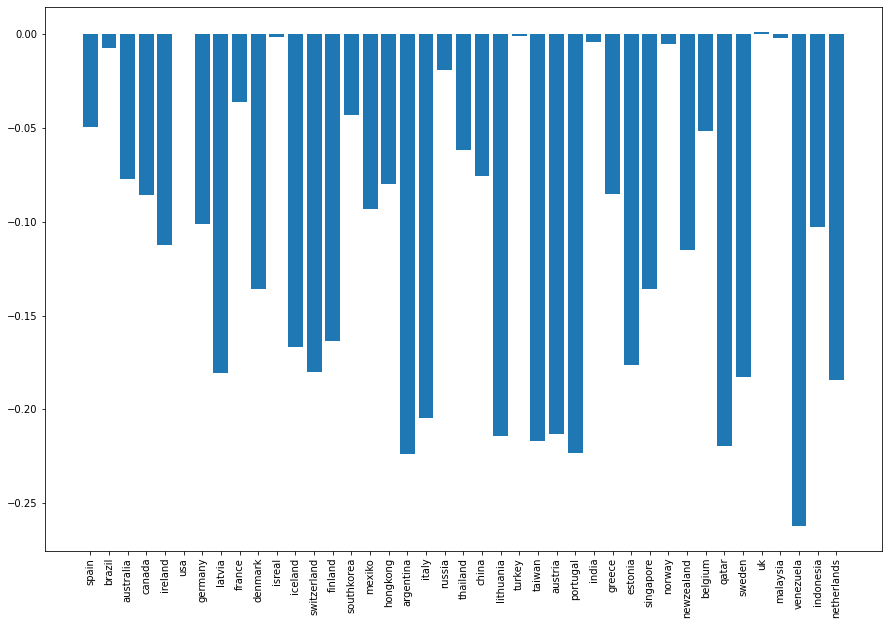

In [63]:
correlation_bar_chart("ema20", volatility_correlations)

In [ ]:
correlation_bar_chart("horizontal_threshold50", volatility_correlations)